In [1]:
from scipy.sparse import eye, csr_matrix, spdiags
from scipy.sparse.linalg import eigs, spsolve
import sys
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

sys.path.append("D:/Google Drive/Python/QD-energy/Lib/")
import geometry
import matrix
import parameter
from QD import int_cyl, Builder, Solver


In [58]:
"""""""""""""""""""""  QD Dimension  """""""""""""""""""""""
" materials = [Material1, Material2, Material3]            "
" radius = [Mat1's radius, Mat2's radius                   "
""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
# for  QD
materials = ['CdS', 'CdSe', 'CdS']
radius1 = [3.3e-9, 1.9e-9, 1.3e-9]  # from outside to inside
radius2 = [4.7e-9, 1.9e-9, 1.3e-9]
radius3 = [5.2e-9, 1.9e-9, 1.3e-9]
radius4 = [6.5e-9, 1.9e-9, 1.3e-9]
radius5 = [7.3e-9, 1.9e-9, 1.3e-9]
""""""""""""""""   Nanorod Dimension """""""""""""""""""""""
" Material1 = [Material, radius, starting z, ending z]     "
" Materials = [Material1, Material2, Material3]            "
" Mat3's ending z should be the highest                    "
" Material1's starting z should be 2e-9                    "
""""""""""""""""""""""""""""""""""""""""""""""""""""""
# for Nanorod
#material1 = ['ZnSe', 2e-9, 2e-9, 5e-9]
#material2 = ['CdS', 2e-9, 5e-9, 8e-9]
#materials = [material1, material2]


"""""""""""""""""""   dot in rod Dimension  """"""""""""""""
" rod = [Material, radius, starting z, ending z]           "
" dot = [Material, radius, center point (z)]               "
" Materials = [rod, dot]                                   "  
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""
# for dot in rod
#rod = ['CdS', 2.7e-9, 2e-9, 22e-9]
#dot = ['CdSe', 2e-9, 12e-9]
#materials = [rod, dot]

""""""""""""""""  non_concentric Dimension    """"""""""""""
" dot = [Material, radius, center point (z)]           "
" dot = [Material, radius, center point (z)]               "
" Materials = [rod, dot]                                   "  
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""
# for non_concentric
dot1 = ['CdS', 3.4e-9, 5.1e-9]
dot2 = ['CdSe', 2.5e-9, 5.3e-9]
dot3 = ['CdS', 1.3e-9, 5.3e-9]
materials = [dot1, dot2, dot3]

dr = 2e-10
dz = 2e-10
#field = -400

In [59]:
a1 = Builder(dr,dz)
a1.non_concentric(materials)
a1.matrix()
b1 = Solver()
b1.solve(a1)
eo1 = b1.energy
print ('E0 : {}'.format(b1.energy))
b1.self_consistency(a1, 10, charges = 'exciton', image_charge = True)
print ('Ex : {}'.format(b1.energy))
ex1 = b1.energy
b1.self_consistency(a1, 20, charges = 'biexciton', image_charge = True)
print ('Exx : {}'.format(b1.energy))
exx1 = b1.energy

Bulk Eg = 1.74
mesh size = 28 x 55 = 1540
E0 : 2.027963497237675
Iteration 0, E. difference : 0.0603, Exx : 1.9677
Ex : 1.9670312948590016
Iteration 0, E. difference : 0.0587, Exx : 1.9693
Iteration 1, E. difference : 0.0020, Exx : 1.9673
Iteration 2, E. difference : 0.0068, Exx : 1.9605
Iteration 3, E. difference : 0.0272, Exx : 1.9333
Iteration 4, E. difference : 0.0414, Exx : 1.8918
Iteration 5, E. difference : 0.0404, Exx : 1.8514
Iteration 6, E. difference : 0.0116, Exx : 1.8398
Iteration 7, E. difference : 0.0197, Exx : 1.8200
Iteration 8, E. difference : 0.0070, Exx : 1.8271
Iteration 9, E. difference : 0.0138, Exx : 1.8133
Iteration 10, E. difference : 0.0113, Exx : 1.8245
Iteration 11, E. difference : 0.0126, Exx : 1.8119
Iteration 12, E. difference : 0.0121, Exx : 1.8240
Iteration 13, E. difference : 0.0124, Exx : 1.8116
Iteration 14, E. difference : 0.0123, Exx : 1.8239
Iteration 15, E. difference : 0.0123, Exx : 1.8116
Iteration 16, E. difference : 0.0123, Exx : 1.8239
Iter

In [12]:
b1.self_consistency(a1, 4, charges = 'biexciton', image_charge = True)
print ('Exx : {}'.format(b1.energy))
exx1 = b1.energy

Iteration 0, E. difference : 0.0385, Exx : 2.3099
Iteration 1, E. difference : 0.0204, Exx : 2.2895
Iteration 2, E. difference : 0.0059, Exx : 2.2954
Iteration 3, E. difference : 0.0026, Exx : 2.2929
Exx : 2.29286852521534


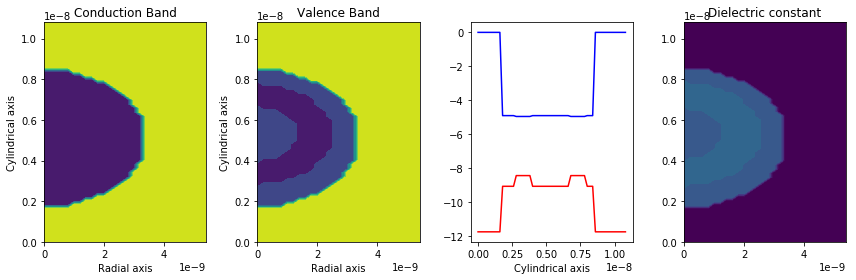

In [60]:
a1.plot_energy_band()

1.8117141028761705

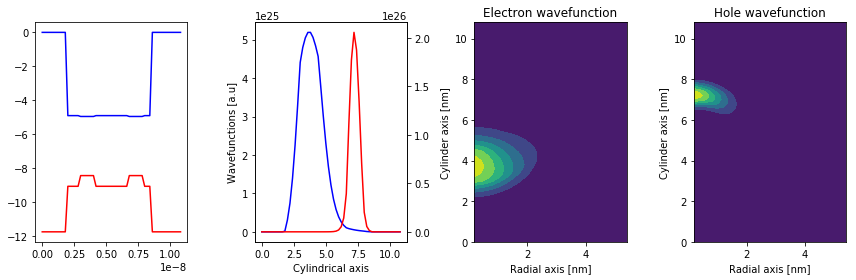

In [45]:
#b5.self_consistency(a5, 10, charges = 'biexciton')
b1.plot(a1)
b1.energy

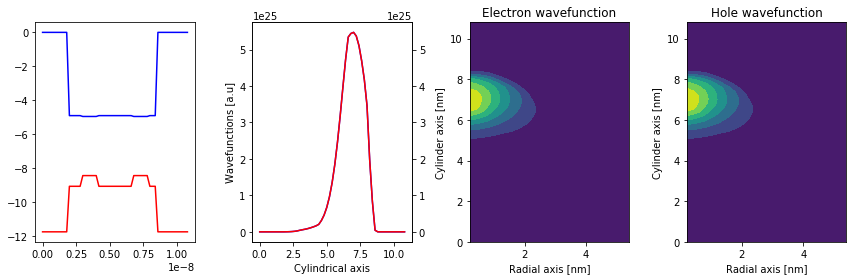

In [46]:
fig, ((ax1, ax2, ax4, ax5)) = plt.subplots(1, 4, figsize = (12,4))

ax1 = plt.subplot(141)
ax1.plot(a1.z, a1.cb[0,:a1.n] , 'b')
ax1.plot(a1.z, -a1.vb[0,:a1.n] - a1.Eg , 'r')

ax2 = plt.subplot(142)
ax2.plot(a1.z * 1e9, np.abs(b1.pre_e[:a1.n]), color = 'blue', label = 'Electron Wavefunction')
ax2.set_xlabel('Cylindrical axis')
ax2.set_ylabel('Wavefunctions [a.u]')
#ax1.axvline(1e9 * (sys.zo/2 + radius[0]), color = 'g', linestyle = '--')
#ax1.axvline(1e9 * (sys.zo/2 - radius[0]), color = 'g', linestyle = '--')
ax3 = ax2.twinx()
ax3.plot(a1.z * 1e9, np.abs(b1.pre_h[:a1.n]), color = 'red', label = 'Hole Wavefunction')

e2d = b1.pre_e.reshape((a1.m-1), a1.n)
h2d = b1.pre_h.reshape((a1.m-1), a1.n)
    
ax4 = plt.subplot(143)
ax4.contourf(a1.r[1:] * 1e9, a1.z * 1e9, e2d.transpose())
ax4.set_title('Electron wavefunction')
ax4.set_ylabel('Cylinder axis [nm]')
ax4.set_xlabel('Radial axis [nm]')

ax5 = plt.subplot(144)
ax5.contourf(a1.r[1:] * 1e9, a1.z*1e9, h2d.transpose())
ax5.set_title('Hole wavefunction')
ax5.set_ylabel('Cylinder axis [nm]')
ax5.set_xlabel('Radial axis [nm]')
plt.tight_layout()

In [22]:
a2 = Builder(dr, dz)
a2.non_concentric(materials)
a2.matrix()
b2 = Solver()
b2.solve(a2)
eo2 = b2.energy
print('E0 : {}'.format(b2.energy))
b2.self_consistency(a2, 10, charges='exciton', image_charge=True)
print('Ex : {}'.format(b2.energy))
ex2 = b2.energy
b2.self_consistency(a2, 10, charges='biexciton', image_charge=True)
print('Exx : {}'.format(b2.energy))
exx2 = b2.energy

Bulk Eg = 1.74
mesh size = 33 x 65 = 2145
E0 : 2.3719140657960036
Iteration 0, Energy difference : 0.06901081479419391
Iteration 1, Energy difference : 0.003850247178392774
Ex : 2.2991084784139204
Iteration 0, Energy difference : 0.060103182690408374
Iteration 1, Energy difference : 0.008132930949717121
Iteration 2, Energy difference : 0.001087692326638301
Iteration 3, Energy difference : 0.0019230224038868649
Iteration 4, Energy difference : 0.004099220258136693
Iteration 5, Energy difference : 0.013218671379935376
Iteration 6, Energy difference : 0.022288119412682494
Iteration 7, Energy difference : 0.02701107023511895
Iteration 8, Energy difference : 0.015353398408209262
Iteration 9, Energy difference : 0.011703579866980895
Exx : 2.209168562517564


In [24]:
a3 = Builder(dr,dz)
a3.non_concentric(materials)
a3.matrix()
b3 = Solver()
b3.solve(a3)
print ('E0 : {}'.format(b3.energy))
eo3 = b3.energy
b3.self_consistency(a3, 10, charges = 'exciton', image_charge = True)
print ('Ex : {}'.format(b3.energy))
ex3 = b3.energy
b3.self_consistency(a3, 10, charges = 'biexciton', image_charge = True)
print ('Exx : {}'.format(b3.energy))
exx3 = b3.energy

Bulk Eg = 1.74
mesh size = 38 x 75 = 2850
E0 : 2.3549822359477224
Iteration 0, Energy difference : 0.05986185655243004
Iteration 1, Energy difference : 0.00665115536514449
Ex : 2.2887149124469115
Iteration 0, Energy difference : 0.04585677581593117
Iteration 1, Energy difference : 0.015515347002440727
Iteration 2, Energy difference : 0.0037932126050934656
Iteration 3, Energy difference : 0.0019488661204491997
Iteration 4, Energy difference : 0.001341966436724018
Iteration 5, Energy difference : 0.006136204842783766
Iteration 6, Energy difference : 0.013225095146523813
Iteration 7, Energy difference : 0.02188850950386545
Iteration 8, Energy difference : 0.01871829059666874
Iteration 9, Energy difference : 0.01361923672158527
Exx : 2.2205251563658455


In [6]:
a4 = Builder(dr,dz)
a4.QD(materials, radius4)
a4.matrix()
b4 = Solver()
b4.solve(a4)
print ('E0 : {}'.format(b4.energy))
eo4 = b4.energy
b4.self_consistency(a4, 10, charges = 'exciton', image_charge = True)
print ('Ex : {}'.format(b4.energy))
ex4 = b4.energy
b4.self_consistency(a4, 10, charges = 'biexciton', image_charge = True)
print ('Exx : {}'.format(b4.energy))
exx4 = b4.energy

Bulk Eg = 1.74
mesh size = 44 x 86 = 3784
E0 : 2.1554504391632223
Iteration 0, Energy difference : 0.05466567293236446
Iteration 1, Energy difference : 0.0079452638144355
Ex : 2.093206847160469
Iteration 0, Energy difference : 0.03869079867407832
Iteration 1, Energy difference : 0.017830521893789975
Iteration 2, Energy difference : 0.0037665973213272252
Exx : 2.101812056089063


In [16]:
a5 = Builder(dr,dz)
a5.non_concentric(materials)
a5.matrix()
b5 = Solver()
b5.solve(a5)
print ('E0 : {}'.format(b5.energy))
eo5 = b5.energy
b5.self_consistency(a5, 10, charges = 'exciton', image_charge = True)
print ('Ex : {}'.format(b5.energy))
ex5 = b5.energy
b5.self_consistency(a5, 10, charges = 'biexciton', image_charge = True)
print ('Exx : {}'.format(b5.energy))
exx5 = b5.energy

Bulk Eg = 1.74
mesh size = 48 x 95 = 4560
E0 : 2.338532433826288
Iteration 0, Energy difference : 0.045571336714391286
Iteration 1, Energy difference : 0.013012159067997686
Ex : 2.28091047986542
Iteration 0, Energy difference : 0.025515979218341034
Iteration 1, Energy difference : 0.031113397866015635
Iteration 2, Energy difference : 0.011487839789506626
Iteration 3, Energy difference : 0.005069392221718427
Iteration 4, Energy difference : 0.0017814065110930422
Iteration 5, Energy difference : 0.0019471985812113957
Iteration 6, Energy difference : 0.0025335238781765135
Iteration 7, Energy difference : 0.007787673215602364
Iteration 8, Energy difference : 0.01385441142142163
Iteration 9, Energy difference : 0.017526075664959784
Exx : 2.24645402805944


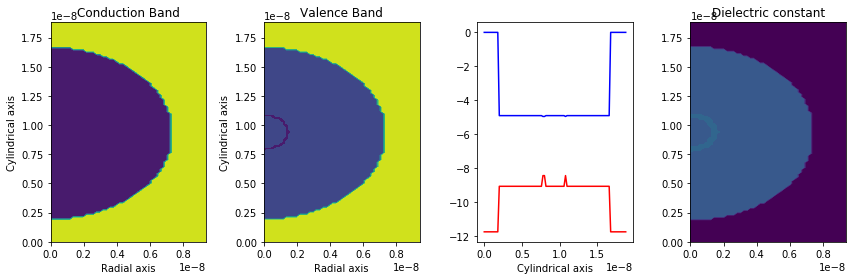

In [17]:
a5.plot_energy_band()

In [92]:
import pandas as pd
data = [[eo1, ex1, exx1], [eo2, ex2,exx2], [eo3, ex3,exx3], [eo4, ex4,exx4], [eo5, ex5,exx5]]
pd = pd.DataFrame(data)
pd.to_excel('D:/Google Drive/Python/QD-energy/1.xls')

2.2901029108208095

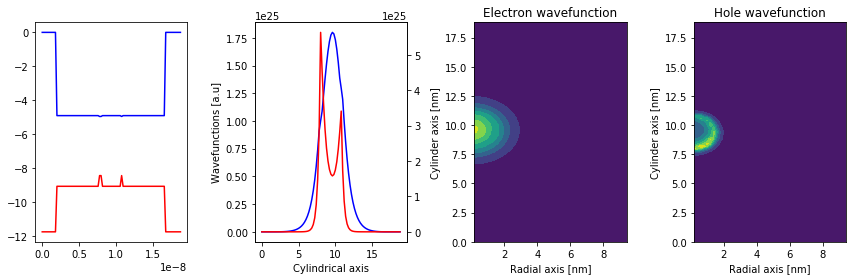

In [16]:
#b5.self_consistency(a5, 10, charges = 'biexciton')
b1.plot(a1)
b1.energy

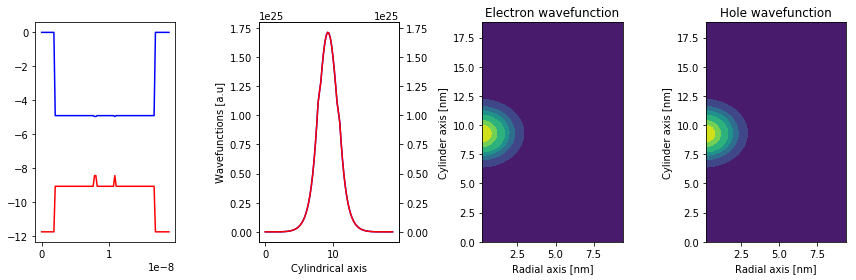

In [17]:
fig, ((ax1, ax2, ax4, ax5)) = plt.subplots(1, 4, figsize = (12,4))

ax1 = plt.subplot(141)
ax1.plot(a1.z, a1.cb[0,:a1.n] , 'b')
ax1.plot(a1.z, -a1.vb[0,:a1.n] - a1.Eg , 'r')

ax2 = plt.subplot(142)
ax2.plot(a1.z * 1e9, np.abs(b1.pre_e[:a1.n]), color = 'blue', label = 'Electron Wavefunction')
ax2.set_xlabel('Cylindrical axis')
ax2.set_ylabel('Wavefunctions [a.u]')
#ax1.axvline(1e9 * (sys.zo/2 + radius[0]), color = 'g', linestyle = '--')
#ax1.axvline(1e9 * (sys.zo/2 - radius[0]), color = 'g', linestyle = '--')
ax3 = ax2.twinx()
ax3.plot(a1.z * 1e9, np.abs(b1.pre_h[:a1.n]), color = 'red', label = 'Hole Wavefunction')

e2d = b1.pre_e.reshape((a1.m-1), a1.n)
h2d = b1.pre_h.reshape((a1.m-1), a1.n)
    
ax4 = plt.subplot(143)
ax4.contourf(a1.r[1:] * 1e9, a1.z * 1e9, e2d.transpose())
ax4.set_title('Electron wavefunction')
ax4.set_ylabel('Cylinder axis [nm]')
ax4.set_xlabel('Radial axis [nm]')

ax5 = plt.subplot(144)
ax5.contourf(a1.r[1:] * 1e9, a1.z*1e9, h2d.transpose())
ax5.set_title('Hole wavefunction')
ax5.set_ylabel('Cylinder axis [nm]')
ax5.set_xlabel('Radial axis [nm]')
plt.tight_layout()

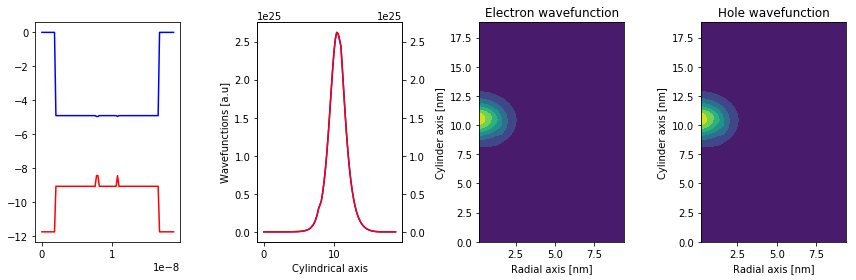

In [26]:
fig, ((ax1, ax2, ax4, ax5)) = plt.subplots(1, 4, figsize = (12,4))

ax1 = plt.subplot(141)
ax1.plot(a5.z, a5.cb[0,:a5.n] , 'b')
ax1.plot(a5.z, -a5.vb[0,:a5.n] - a5.Eg , 'r')

ax2 = plt.subplot(142)
ax2.plot(a5.z * 1e9, np.abs(b5.pre_e[:a5.n]), color = 'blue', label = 'Electron Wavefunction')
ax2.set_xlabel('Cylindrical axis')
ax2.set_ylabel('Wavefunctions [a.u]')
#ax1.axvline(1e9 * (sys.zo/2 + radius[0]), color = 'g', linestyle = '--')
#ax1.axvline(1e9 * (sys.zo/2 - radius[0]), color = 'g', linestyle = '--')
ax3 = ax2.twinx()
ax3.plot(a5.z * 1e9, np.abs(b5.pre_h[:a5.n]), color = 'red', label = 'Hole Wavefunction')

e2d = b5.pre_e.reshape((a5.m-1), a5.n)
h2d = b5.pre_h.reshape((a5.m-1), a5.n)
    
ax4 = plt.subplot(143)
ax4.contourf(a5.r[1:] * 1e9, a5.z * 1e9, e2d.transpose())
ax4.set_title('Electron wavefunction')
ax4.set_ylabel('Cylinder axis [nm]')
ax4.set_xlabel('Radial axis [nm]')

ax5 = plt.subplot(144)
ax5.contourf(a5.r[1:] * 1e9, a5.z*1e9, h2d.transpose())
ax5.set_title('Hole wavefunction')
ax5.set_ylabel('Cylinder axis [nm]')
ax5.set_xlabel('Radial axis [nm]')
plt.tight_layout()

In [13]:
vcoul = matrix.inhomo_laplacian(a.m, a.dr, a.n, a.dz, a.r, a.er_array)
ve = spsolve(vcoul, np.abs(b.psi_e2)*a.e/a.eo)
vh = spsolve(vcoul, np.abs(b.psi_h2)*a.e/a.eo)

veDiag = np.diag(ve)
vhDiag = np.diag(vh)

Jee = np.dot(b.psi_e2.T, np.dot(veDiag, b.psi_e2))
Jhh = np.dot(b.psi_h2.T, np.dot(vhDiag, b.psi_h2))
Jeh = np.dot(b.psi_e2.T, np.dot(vhDiag, b.psi_e2))
braketE = np.dot(b.psi_e2.T, b.psi_e2)
braketH = np.dot(b.psi_h2.T, b.psi_h2)

Jee /= braketE; #Jee = Jee[0]
Jhh /= braketH; #Jhh = Jhh[0]
Jeh /= braketE; #Jeh = Jeh[0]

print (Jee, Jhh, Jeh)

deltaxx = -Jee-Jhh+2*Jeh
print (deltaxx)


[[-0.05199321+0.j]] [[-0.0969137+0.j]] [[-0.079925+0.j]]
[[-0.0109431+0.j]]


0 : Energy difference : 0.04935761076597367


0.9151771655149631

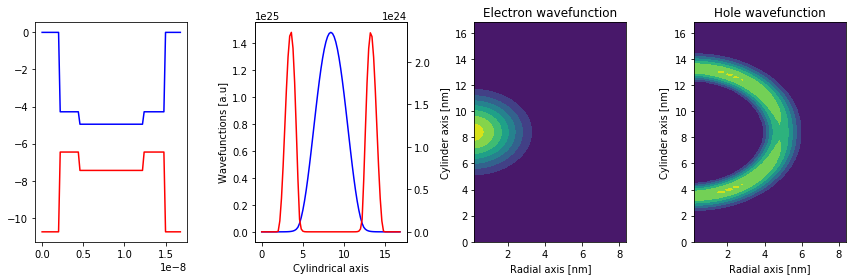

In [19]:
b.self_consistency(a, 10, charges = 'biexciton')
b.plot(a)
b.energy

In [20]:
dxx = 0.915 - 0.965
ex = 0.888 - 0.965
print (dxx, ex)
print (2*ex - dxx)

-0.04999999999999993 -0.07699999999999996
-0.10399999999999998


In [ ]:
ve = spsolve(vcoul, np.abs(psi_e2)*e/eo)
vh = spsolve(vcoul, np.abs(psi_h2)*e/eo)

veDiag = np.diag(ve)
vhDiag = np.diag(vh)

Jee = np.dot(psi_e2.T, np.dot(veDiag, psi_e2))
Jhh = np.dot(psi_h2.T, np.dot(vhDiag, psi_h2))
Jeh = np.dot(psi_e2.T, np.dot(vhDiag, psi_e2))
braketE = np.dot(psi_e2.T, psi_e2)
braketH = np.dot(psi_h2.T, psi_h2)

Jee /= braketE; #Jee = Jee[0]
Jhh /= braketH; #Jhh = Jhh[0]
Jeh /= braketE; #Jeh = Jeh[0]

print Jee, Jhh, Jeh

deltaxx = -Jee-Jhh+2*Jeh
print deltaxx

In [8]:
eo = []
ex = []
exx = []
core = 3.9e-9
D = {}
E = {}
for i in range(len(shell)):
    materials = ['CdTe', 'CdSe']  
    radius = [core+shell[i], core]  # from outside to inside
    D[shell[i]] = Builder(dr,dz)
    D[shell[i]].QD(materials, radius)
    D[shell[i]].matrix()
    E[shell[i]] = Solver()
    E[shell[i]].solve( D[shell[i]], e_field = False)
    eo.append(E[shell[i]].energy)
    E[shell[i]].self_consistency(D[shell[i]], 10, e_field = False, charges = 'exciton', image_charge = True)
    ex.append(E[shell[i]].energy)
    E[shell[i]].self_consistency(D[shell[i]], 10, e_field = False, charges = 'biexciton', image_charge = True)
    exx.append(E[shell[i]].energy)

Bulk Eg = 0.75
mesh size = 32 x 63 = 2016
Energy : 2.3418857486987e-16 eV
Energy : 2.5538454942994756e-15 eV
Energy : 6.442143797195901e-15 eV
Energy : 1.3337442520833699e-15 eV
Energy : 3.110512452643744e-15 eV
Bulk Eg = 0.75
mesh size = 34 x 66 = 2244
Energy : 1.5991967604328738 eV
Energy : 1.5991967604328683 eV
Energy : 1.5705716517228687 eV
0 : Energy difference : 0.02862510870999957
Energy : 1.5701243271926892 eV
Energy : 1.5991967604328712 eV
Energy : 1.5938002029731106 eV
0 : Energy difference : 0.0053965574597605315
Energy : 1.5910347486918484 eV
1 : Energy difference : 0.0027654542812622918
Energy : 1.5704343867322208 eV
2 : Energy difference : 0.020600361959627556
Energy : 1.5327181059472657 eV
3 : Energy difference : 0.03771628078495515
Energy : 1.512185956485921 eV
4 : Energy difference : 0.02053214946134463
Energy : 1.5014721426048647 eV
5 : Energy difference : 0.0107138138810563
Energy : 1.4972210444637917 eV
6 : Energy difference : 0.004251098141073051
Energy : 1.4958626

In [14]:
eo

[2.3418857486987e-16,
 1.5991967604328738,
 1.330098002396608,
 1.2023222294163785,
 1.1163529695717234,
 1.0629052747561851,
 1.0239735787737763,
 0.9992385271426274,
 0.979801148815743,
 0.9654246894482549]

In [13]:
ex

[6.442143797195901e-15,
 1.5701243271926892,
 1.2939479353983696,
 1.1761055789016823,
 1.0766246930158847,
 1.0369094343150427,
 0.9922911992345524,
 0.9730772322500076,
 0.9531167334397006,
 0.9398572977820963]

In [12]:
exx

[3.110512452643744e-15,
 1.494884885896115,
 1.2498432006826135,
 1.136926565868639,
 1.0508255547810283,
 1.061016933509227,
 0.9728639446416477,
 0.9991048138763898,
 0.9795785116914696,
 0.9663058606562064]

Bulk Eg = 1.74
mesh size = 25 x 121 = 3025


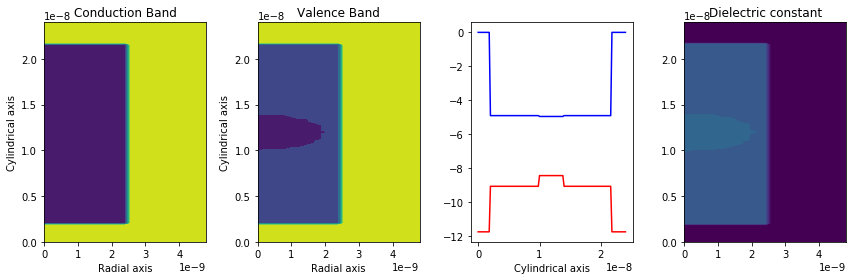

In [3]:
a = Builder(dr, dz)
#a.QD(materials, radius)
#a.nanorod(materials)
a.dot_in_rod(materials)
a.plot_energy_band()
a.matrix()
#a.e_field_matrix(field)

In [4]:
b = Solver()
b.solve(a, e_field = False)
eo = b.energy
#b.self_consistency(a, 10, e_field = False, charges = 'exciton', image_charge = True)
#b.plot(a)
#a.coulomb_matrix(b, charges = 'electron')
#b.solve(a, coulomb_potential = True)
#b.plot(a)

Energy : 1.978877975539789 eV


C:\anaconda3\lib\site-packages\numpy\ma\core.py:2788: ComplexWarning: Casting complex values to real discards the imaginary part
  order=order, subok=True, ndmin=ndmin)


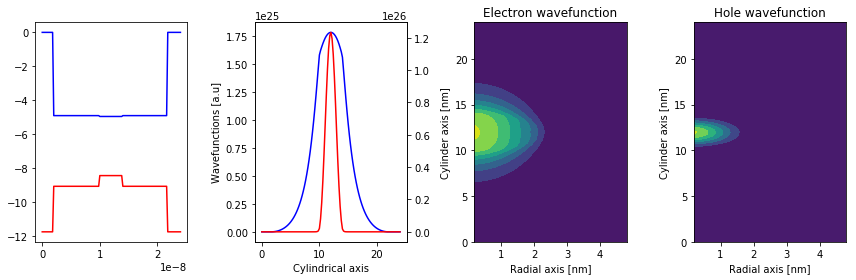

In [5]:
b.plot(a, e_field = False)

In [8]:
b.self_consistency(a, 10, e_field = False, charges = 'exciton', image_charge = True)
ex = b.energy

Energy : 1.978877975539791 eV
Energy : 1.88512686352149 eV
0 : Energy difference : 0.093751112018301
Energy : 1.871426462555732 eV
1 : Energy difference : 0.013700400965757975
Energy : 1.87174657290963 eV


In [9]:
ex

1.87174657290963

In [7]:
exx

1.885649473520913

In [6]:
b.self_consistency(a, 10, e_field = False, charges = 'biexciton', image_charge = True)
exx = b.energy

Energy : 1.9788779755397903 eV
Energy : 1.9062416282643584 eV
0 : Energy difference : 0.07263634727543189
Energy : 1.882929715729906 eV
1 : Energy difference : 0.023311912534452306
Energy : 1.8865583881216554 eV
2 : Energy difference : 0.0036286723917493546
Energy : 1.885649473520913 eV
